<a href="https://colab.research.google.com/github/korCarrot/ADP_Practical_Exam/blob/main/%EC%8A%A4%ED%8F%AC%ED%8B%B0%ED%8C%8C%EC%9D%B4%EB%A5%BC_%EC%9D%B4%EC%9A%A9%ED%95%9C_%EB%85%B8%EB%9E%98_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B0%80%EC%A0%B8%EC%98%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://developer.spotify.com/
# 로그인, dashBoard에서 앱 만들기 후 앱의 setting에서 Client ID와 Client Secret 확인 가능
# 앱 별로 ID, Secret 다르다.

In [2]:
import requests

## 자신의 Client ID와 Client Secret 입력
CLIENT_ID = '88bdee2f7c264baea40d4b1a12da8f5f'
CLIENT_SECRET = 'e98afd50ef2241fcaa69527e65642a2a'

url = 'https://accounts.spotify.com/api/token'

auth_data = {'grant_type': 'client_credentials',
              'client_id': CLIENT_ID,
              'client_secret': CLIENT_SECRET}

r = requests.post(url, data=auth_data) # POST 방법으로 응답을 요청
r_token = r.json() # 응답 객체의 JSON 형식의 데이터를 딕셔너리 타입으로 변환
r_token

{'access_token': 'BQACwwxRXMPMysH63ZW6Qt2PI3aVW7LUWbYrvQbN-oIHzSoTzB55ztGHpOeLpqX9DokGzu53LbhZh9htV-ikzzSeoBMQprezCPnxoGBIi7WKc5GmHHs',
 'token_type': 'Bearer',
 'expires_in': 3600}

In [3]:
def get_spotify_access_token(client_id, client_secret):

    url = 'https://accounts.spotify.com/api/token'

    auth_data = {'grant_type': 'client_credentials',
                  'client_id': client_id,
                  'client_secret': client_secret}

    r = requests.post(url, data=auth_data) # POST 방법으로 응답을 요청
    r_token = r.json() # 응답 객체의 text 부분을 JSON 형식으로 변환

    return r_token['access_token']

In [4]:
ACCESS_TOKEN = get_spotify_access_token(CLIENT_ID, CLIENT_SECRET)
ACCESS_TOKEN

'BQAL4DGdtmzB7VgiE5qjffTovDMaxmVkejv-7t_98H69AcXHEPaNRIzQEL25FX69P7xxl0zhISIAfVpXWMgmjYseHN7kxDKHOyQML2zvXRkrCkcIGh4'

In [5]:
import requests

def get_spotify_artist_info(artist_id):
    url = "https://api.spotify.com/v1/artists/{id}".format(id=artist_id)
    ACCESS_TOKEN = get_spotify_access_token(CLIENT_ID, CLIENT_SECRET)
    headers = {"Authorization": "Bearer " + ACCESS_TOKEN}

    r = requests.get(url, headers=headers)

    return r.json()

In [6]:
artist_id = "3HqSLMAZ3g3d5poNaI7GOU" # 아이유의 아티스트 ID
artist_data = get_spotify_artist_info(artist_id)

print("[아티스트 관련 정보]")
print("- 이름:", artist_data['name'])
print("- ID:", artist_data['id'])
print("- 장르:", artist_data['genres'])
print("- 인기도:", artist_data['popularity'])

[아티스트 관련 정보]
- 이름: IU
- ID: 3HqSLMAZ3g3d5poNaI7GOU
- 장르: ['k-pop', 'pop']
- 인기도: 69


In [7]:
artist_id = "3Nrfpe0tUJi4K4DXYWgMUX" # 방탄소년단(BTS)의 아티스트 ID
artist_data = get_spotify_artist_info(artist_id)

print("[아티스트 관련 정보]")
print("- 이름:", artist_data['name'])
print("- ID:", artist_data['id'])
print("- 장르:", artist_data['genres'])
print("- 인기도:", artist_data['popularity'])

[아티스트 관련 정보]
- 이름: BTS
- ID: 3Nrfpe0tUJi4K4DXYWgMUX
- 장르: ['k-pop', 'k-pop boy group', 'pop']
- 인기도: 83


In [8]:
url = "https://api.spotify.com/v1/markets"

ACCESS_TOKEN = get_spotify_access_token(CLIENT_ID, CLIENT_SECRET)
headers = {"Authorization": "Bearer " + ACCESS_TOKEN}

r = requests.get(url, headers=headers)
r.text[:50] # 앞의 일부만 표시
# r.text     # 전체 표시

'{"markets":["AD","AE","AG","AL","AM","AO","AR","AT'

In [9]:
def get_spotify_artist_top_tracks(artist_id, country_code):

    url = "https://api.spotify.com/v1/artists/{id}/top-tracks".format(id=artist_id)
    ACCESS_TOKEN = get_spotify_access_token(CLIENT_ID, CLIENT_SECRET)
    headers = {"Authorization": "Bearer " + ACCESS_TOKEN}
    parameters = {"market": country_code}
    r = requests.get(url, params=parameters, headers=headers)

    return r.json()

In [10]:
import pandas as pd

artist_id = "3HqSLMAZ3g3d5poNaI7GOU" # 아이유의 아티스트 ID
country_code = "KR" # 대한민국의 국가 코드

# 인기곡 정보 JSON 객체 받기
artist_top_tracks_data = get_spotify_artist_top_tracks(artist_id, country_code)
# 인기곡 정보 JSON 데이터에서 곡 정보 객체 리스트 추출
top_tracks = artist_top_tracks_data['tracks']

[type(top_tracks), len(top_tracks)] # top_tracks의 타입과 개수 출력

[list, 10]

In [11]:
top_tracks[0].keys() # 리스트의 첫 번째 요소로 있는 딕셔너리에서 키만 추출

dict_keys(['album', 'artists', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'is_playable', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])

In [12]:
# 리스트를 DataFrame 데이터로 변환
df_artist_top_track = pd.DataFrame(top_tracks)
# DataFrame 데이터에서 열 선택
df_artist_top_track2 = df_artist_top_track[['artists', 'name', 'duration_ms', 'id', 'popularity']]

df_artist_top_track2.head()

,artists,name,duration_ms,id,popularity
0,[{'external_urls': {'spotify': 'https://open.s...,Love wins all,271080,0djkJ3iAARXRCbfbwwVc3o,77
1,[{'external_urls': {'spotify': 'https://open.s...,People Pt.2 (feat. IU),213995,41JPN7pZMTp1sumBOHOzHd,70
2,[{'external_urls': {'spotify': 'https://open.s...,eight(Prod.&Feat. SUGA of BTS),167573,0pYacDCZuRhcrwGUA5nTBe,71
3,[{'external_urls': {'spotify': 'https://open.s...,LILAC,214253,5xrtzzzikpG3BLbo4q1Yul,69
4,[{'external_urls': {'spotify': 'https://open.s...,Shopper,215720,1c6kkrWnpy68eYDfBdxNtF,68


In [13]:
def get_artists(artists_info):
    artists_name = []
    for artist_info in artists_info:
        name = artist_info['name'] # 아티스트 정보 중 이름만 추출
        artists_name.append(name)  # 아티스트 이름을 리스트로 묶음

    artists_name_str = ", ".join(artists_name) # 리스트로 된 아티스트 이름을 문자열로 변환
    return artists_name_str

In [14]:
df_artist_top_track3 = df_artist_top_track2.copy() # DataFrame 데이터 복사

# get_artists() 함수를 artists 열의 각 항목에 적용
df_artist_top_track3['artists'] = df_artist_top_track3['artists'].apply(get_artists)
df_artist_top_track3.head()

,artists,name,duration_ms,id,popularity
0,IU,Love wins all,271080,0djkJ3iAARXRCbfbwwVc3o,77
1,"Agust D, IU",People Pt.2 (feat. IU),213995,41JPN7pZMTp1sumBOHOzHd,70
2,"IU, SUGA",eight(Prod.&Feat. SUGA of BTS),167573,0pYacDCZuRhcrwGUA5nTBe,71
3,IU,LILAC,214253,5xrtzzzikpG3BLbo4q1Yul,69
4,IU,Shopper,215720,1c6kkrWnpy68eYDfBdxNtF,68


In [15]:
def convert_msec(msec):
    milliseconds = (msec%1000)
    seconds = (msec/1000) % 60
    seconds = int(seconds)
    minutes = (msec/(1000*60)) % 60
    minutes = int(minutes)
    hours = (msec/(1000*60*60)) % 60
    hours = int(hours)

    hms_str = "{0:02d}:{1:02d}:{2:02d}.{3:03d}".format(hours, minutes, seconds, milliseconds)
    return hms_str

In [16]:
df_IU_top_track = df_artist_top_track3.copy() # DataFrame 데이터 복사

# convert_msec() 함수를 duration_ms 열의 각 항목에 적용
df_IU_top_track['duration_ms'] = df_IU_top_track['duration_ms'].apply(convert_msec)

# duration_ms 열 이름을 duration로 변경
df_IU_top_track.rename(columns={'duration_ms':'duration'}, inplace=True)
df_IU_top_track.head()

,artists,name,duration,id,popularity
0,IU,Love wins all,00:04:31.080,0djkJ3iAARXRCbfbwwVc3o,77
1,"Agust D, IU",People Pt.2 (feat. IU),00:03:33.995,41JPN7pZMTp1sumBOHOzHd,70
2,"IU, SUGA",eight(Prod.&Feat. SUGA of BTS),00:02:47.573,0pYacDCZuRhcrwGUA5nTBe,71
3,IU,LILAC,00:03:34.253,5xrtzzzikpG3BLbo4q1Yul,69
4,IU,Shopper,00:03:35.720,1c6kkrWnpy68eYDfBdxNtF,68


In [17]:
df_IU_top_track.columns = ["아티스트", "곡 제목", "곡의 길이", "곡 ID", "인기도"] # 열 제목을 변경
df_IU_top_track.head()

,아티스트,곡 제목,곡의 길이,곡 ID,인기도
0,IU,Love wins all,00:04:31.080,0djkJ3iAARXRCbfbwwVc3o,77
1,"Agust D, IU",People Pt.2 (feat. IU),00:03:33.995,41JPN7pZMTp1sumBOHOzHd,70
2,"IU, SUGA",eight(Prod.&Feat. SUGA of BTS),00:02:47.573,0pYacDCZuRhcrwGUA5nTBe,71
3,IU,LILAC,00:03:34.253,5xrtzzzikpG3BLbo4q1Yul,69
4,IU,Shopper,00:03:35.720,1c6kkrWnpy68eYDfBdxNtF,68


In [18]:
import pandas as pd

def get_artist_top_track(artist_id, country_code):
    # 인기곡 정보 JSON 객체 받기
    artist_top_tracks_data = get_spotify_artist_top_tracks(artist_id, country_code)
    # 인기곡 정보 JSON 데이터에서 곡 정보 객체 리스트 추출
    top_tracks = artist_top_tracks_data['tracks']

    # 리스트를 DataFrame 데이터로 변환
    df_artist_top_track = pd.DataFrame(top_tracks)
    # DataFrame 데이터에서 열 선택
    df_artist_top_track2 = df_artist_top_track[['artists','name', 'duration_ms', 'id', 'popularity']]

    df_artist_top_track3 = df_artist_top_track2.copy() # DataFrame 데이터 복사
    # get_artists() 함수를 artists 열의 각 항목에 적용
    df_artist_top_track3['artists'] = df_artist_top_track3['artists'].apply(get_artists)

    df_artist_top_track4 = df_artist_top_track3.copy() # DataFrame 데이터 복사
    # convert_msec() 함수를 duration_ms 열의 각 항목에 적용
    df_artist_top_track4['duration_ms'] = df_artist_top_track4['duration_ms'].apply(convert_msec)

    # duration_ms 열 이름을 duration로 변경
    df_artist_top_track4.rename(columns={'duration_ms':'duration'}, inplace=True)

    # 열 제목을 변경
    df_artist_top_track4.columns = ["아티스트", "곡 제목", "곡의 길이", "곡 ID", "인기도"]

    return df_artist_top_track4

In [19]:
artist_id = "3Nrfpe0tUJi4K4DXYWgMUX" # 방탄소년단(BTS)의 아티스트 ID
country_code = "US" # 미국의 국가 코드

df_BTS_top_track = get_artist_top_track(artist_id, country_code)
df_BTS_top_track.head()

,아티스트,곡 제목,곡의 길이,곡 ID,인기도
0,BTS,Dynamite,00:03:19.053,5QDLhrAOJJdNAmCTJ8xMyW,80
1,"Coldplay, BTS",My Universe,00:03:46.198,46HNZY1i7O6jwTA7Slo2PI,76
2,"Charlie Puth, Jung Kook, BTS",Left and Right (Feat. Jung Kook of BTS),00:02:34.486,5Odq8ohlgIbQKMZivbWkEo,78
3,BTS,FAKE LOVE,00:04:02.333,6m1TWFMeon7ai9XLOzdbiR,77
4,BTS,Butter,00:02:44.952,6jjYDGxVJsWS0a5wlVF5vS,76


In [20]:
def get_spotify_artist_albums_tracks(artist_id, include_groups=None):

    url = "https://api.spotify.com/v1/artists/{id}/albums".format(id=artist_id)
    ACCESS_TOKEN = get_spotify_access_token(CLIENT_ID, CLIENT_SECRET)

    parameters = {"include_groups": include_groups}
    headers = {"Authorization": "Bearer " + ACCESS_TOKEN}

    if(include_groups==None): # 앨범 타입을 지정하지 않을 경우 params 인수 없이 호출
        r = requests.get(url, headers=headers)
    else:                     # 앨범 타입을 지정할 경우 params 인수 호출
        r = requests.get(url, params=parameters, headers=headers)

    return r.json()

In [21]:
import pandas as pd

artist_id = "3HqSLMAZ3g3d5poNaI7GOU" # 아이유의 아티스트 ID

# album, single, appears_on, compilation
include_groups = "album,single"

artist_albums_data = get_spotify_artist_albums_tracks(artist_id, include_groups)
# artist_albums_data = get_sptoify_artist_albums_tracks(artist_id)
artist_albums = artist_albums_data['items']

albums_info = []
for album in artist_albums:
    albums_name_release_date = {"name":album['name'],
                                "album_type":album['album_type'],
                                "release_date":album['release_date'],
                                "album_id":album['id'],}
    albums_info.append(albums_name_release_date)

df_albums = pd.DataFrame(albums_info)
df_albums[0:10]

,name,album_type,release_date,album_id
0,IU 5th Album 'LILAC',album,2021-03-25,01dPJcwyht77brL4JQiR8R
1,Palette,album,2017-04-21,5V8n6fqyAPxvFTibPhQVcp
2,Modern Times – Epilogue,album,2013-12-20,56MqewtCUq5bplrqEYTVL0
3,Modern Times,album,2013-10-08,2QcuXvQBWv1ZKyQtEhLbFe
4,Last Fantasy,album,2011-11-29,149BHv6qAyMgJ483vPi77C
5,Growing Up,album,2009-04-23,2xJZSgxlKvcOCR2aLA8Pq2
6,The Winning,single,2024-02-20,08CvAj58nVMpq1Nw7T6maj
7,Love wins all,single,2024-01-24,2bwwRhKbLeD3LvNDXauV2T
8,People Pt.2 (feat. IU),single,2023-04-07,1l12B55qdesQorPcQLJDRo
9,Mother Nature (H₂O),single,2022-01-27,6gdnJ11QQyvpVljTUR3BWw


In [22]:
df_albums[df_albums['album_type']=='album']

,name,album_type,release_date,album_id
0,IU 5th Album 'LILAC',album,2021-03-25,01dPJcwyht77brL4JQiR8R
1,Palette,album,2017-04-21,5V8n6fqyAPxvFTibPhQVcp
2,Modern Times – Epilogue,album,2013-12-20,56MqewtCUq5bplrqEYTVL0
3,Modern Times,album,2013-10-08,2QcuXvQBWv1ZKyQtEhLbFe
4,Last Fantasy,album,2011-11-29,149BHv6qAyMgJ483vPi77C
5,Growing Up,album,2009-04-23,2xJZSgxlKvcOCR2aLA8Pq2


In [23]:
import pandas as pd

def get_artist_albums(artist_id, include_groups=None):

    artist_albums_data = get_spotify_artist_albums_tracks(artist_id, include_groups)
    artist_albums = artist_albums_data['items']

    albums_info = []
    for album in artist_albums:
        albums_name_release_date = {"name":album['name'],
                                    "album_type":album['album_type'],
                                    "release_date":album['release_date'],
                                    "album_id":album['id'],}
        albums_info.append(albums_name_release_date)

    df_albums = pd.DataFrame(albums_info)
    return df_albums

In [24]:
artist_id = "6OwKE9Ez6ALxpTaKcT5ayv" # 악동뮤지션(악뮤)의 아티스트 ID

df_AKMU_albums = get_artist_albums(artist_id)
df_AKMU_albums.head()

,name,album_type,release_date,album_id
0,AKMU 'SAILING' TOUR LIVE,album,2020-07-03,1LjVPwNUFOYgZBjur0BWkz
1,SAILING,album,2019-09-25,7C0Ci0alKWwwXPIFYEdVcn
2,WINTER,album,2017-01-03,0xrAlQfw3MZ5QGhw2NptQt
3,PLAY,album,2014-04-07,1eu07xRE0vQfN5et0Y3DAy
4,Love Lee,single,2023-08-21,47xcjDSi1t6pQE2RvXKdUF


In [25]:
import requests

def get_spotify_track_info(track_id):
    url = "https://api.spotify.com/v1/tracks/{id}".format(id=track_id)
    ACCESS_TOKEN = get_spotify_access_token(CLIENT_ID, CLIENT_SECRET)

    headers = {"Authorization": "Bearer " + ACCESS_TOKEN} # 헤더 생성
    r = requests.get(url, headers=headers) # GET 방법으로 요청해 응답받음

    return r.json()

In [26]:
track_id = "2bgTY4UwhfBYhGT4HUYStN" # 트랙 ID(방탄소년단 Butter)
track_data = get_spotify_track_info(track_id)

print("[트랙(곡) 정보]")
print("- 아티스트:", get_artists(track_data['artists'])) # get_artists() 함수 이용
print("- 트랙(곡) 제목:", track_data['name'])
print("- 발표일:", track_data['album']['release_date'])
print("- 트랙(곡) 길이:", convert_msec(track_data['duration_ms'])) # convert_msec() 함수 이용
print("- 트랙 ID:", track_data['id'])
print("- 인기도:", track_data['popularity'])

[트랙(곡) 정보]
- 아티스트: BTS
- 트랙(곡) 제목: Butter
- 발표일: 2021-06-04
- 트랙(곡) 길이: 00:02:44.441
- 트랙 ID: 2bgTY4UwhfBYhGT4HUYStN
- 인기도: 1


In [27]:
import requests

def get_spotify_audio_features(track_id):
    url = "https://api.spotify.com/v1/audio-features/{id}".format(id=track_id)
    ACCESS_TOKEN = get_spotify_access_token(CLIENT_ID, CLIENT_SECRET)

    headers = {"Authorization": "Bearer " + ACCESS_TOKEN} # 헤더 생성
    r = requests.get(url, headers=headers) # GET 방법으로 요청해 응답받음

    return r.json()

In [28]:
track_id = "2bgTY4UwhfBYhGT4HUYStN" # 트랙 ID(방탄소년단 Butter)
audio_features_data = get_spotify_audio_features(track_id)
audio_features_data

{'danceability': 0.759,
 'energy': 0.459,
 'key': 8,
 'loudness': -5.187,
 'mode': 1,
 'speechiness': 0.0948,
 'acousticness': 0.00323,
 'instrumentalness': 0,
 'liveness': 0.0906,
 'valence': 0.695,
 'tempo': 109.997,
 'type': 'audio_features',
 'id': '2bgTY4UwhfBYhGT4HUYStN',
 'uri': 'spotify:track:2bgTY4UwhfBYhGT4HUYStN',
 'track_href': 'https://api.spotify.com/v1/tracks/2bgTY4UwhfBYhGT4HUYStN',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2bgTY4UwhfBYhGT4HUYStN',
 'duration_ms': 164442,
 'time_signature': 4}

In [29]:
import pandas as pd

track_IDs = ["2bgTY4UwhfBYhGT4HUYStN", # 방탄소년단 Butter
             "3P3UA61WRQqwCXaoFOTENd", # 아이유 밤편지
             "5FKdWT5A7vDTEnPiHrruFY", # 김동률 출발
             "4ribiWWnI451QMRdOgByIP", # 이무진 비와 당신
             "1s6GWG2BrEWLE8sbd1lXME", # 악뮤 오랜 날 오랜 밤
             "4t2FIqZJORKZGSKg30SShr", # 악뮤(with IU) 낙하
             "1iIhGHzzrzqQfuNkFI2qAn", # 지코 아무 노래
             "4XaG9IpCXklOcuau1sIrUX", # 퀸(Queen) We Are The Champions
             "7vd1j4IDTU0koES9M8dvBQ", # 이루마 Kiss The Rain
             "3L1Ssz5HaOV3ZG9eJnV8UY"] # 피아노 캐논 변주곡

tracks_audio_features = [] # 여러 곡의 오디오 특징 리스트

for track_ID in track_IDs:
    # 아티스트와 트랙 이름 가져오기
    track_info = get_spotify_track_info(track_ID)

    # 트랙의 오디오 특징을 가져오기
    audio_features = get_spotify_audio_features(track_ID)

    # 아티스트와 트랙 정보와 오디오 특징 통합
    track_audio_features = {"artists":get_artists(track_info['artists']),
                            "title":track_info['name'],
                            "danceability":audio_features['danceability'],
                            "energy":audio_features['energy'],
                            "valence":audio_features['valence'],
                            "acousticness":audio_features['acousticness'],
                            "speechiness":audio_features['speechiness'],
                            "instrumentalness":audio_features['instrumentalness'],
                            "liveness":audio_features['liveness']}

    # 트랙의 오디오 특징 정보를 리스트에 담기
    tracks_audio_features.append(track_audio_features)

# DataFrame 데이터로 변환
df_tracks_audio_features = pd.DataFrame(tracks_audio_features)
df_tracks_audio_features

,artists,title,danceability,energy,valence,acousticness,speechiness,instrumentalness,liveness
0,BTS,Butter,0.759,0.4590,0.695,0.00323,0.0948,0.000000,0.0906
1,IU,Through the Night,0.428,0.3130,0.284,0.75700,0.0391,0.000000,0.3090
2,Kim Dong Ryul,Departure,0.438,0.3850,0.378,0.83500,0.0288,0.001520,0.1210
3,Lee Mujin,Rain and You,0.520,0.2750,0.244,0.77700,0.0270,0.000073,0.1550
4,AKMU,Last goodbye,0.581,0.4100,0.285,0.73300,0.0278,0.000000,0.1290
5,"AKMU, IU",NAKKA (with IU),0.816,0.6360,0.499,0.07320,0.1010,0.000028,0.1180
6,ZICO,Any song,0.874,0.7870,0.896,0.11800,0.1290,0.000000,0.1100
7,Queen,We Are The Champions - Live Aid,0.305,0.8580,0.186,0.17800,0.0673,0.000041,0.9010
8,Yiruma,Kiss The Rain,0.560,0.0519,0.182,0.99000,0.0423,0.905000,0.1170
9,Piano,캐논변주곡,0.537,0.2050,0.284,0.99200,0.0549,0.939000,0.0760


In [30]:
# colab은 우분투 사용 (usr-유닉스시스템리소스 폴더 안에 share 안에 폰트)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [42]:
import matplotlib as mpl

# mpl.rcParams['font.family'] = 'Malgun Gothic' # '맑은 고딕'으로 폰트 설정
mpl.rcParams['font.family'] = 'NanumGothic' # '나눔 고딕'으로 폰트 설정
mpl.rcParams['axes.unicode_minus'] = False   # 마이너스(-) 폰트 깨짐 방지

In [43]:
%matplotlib inline

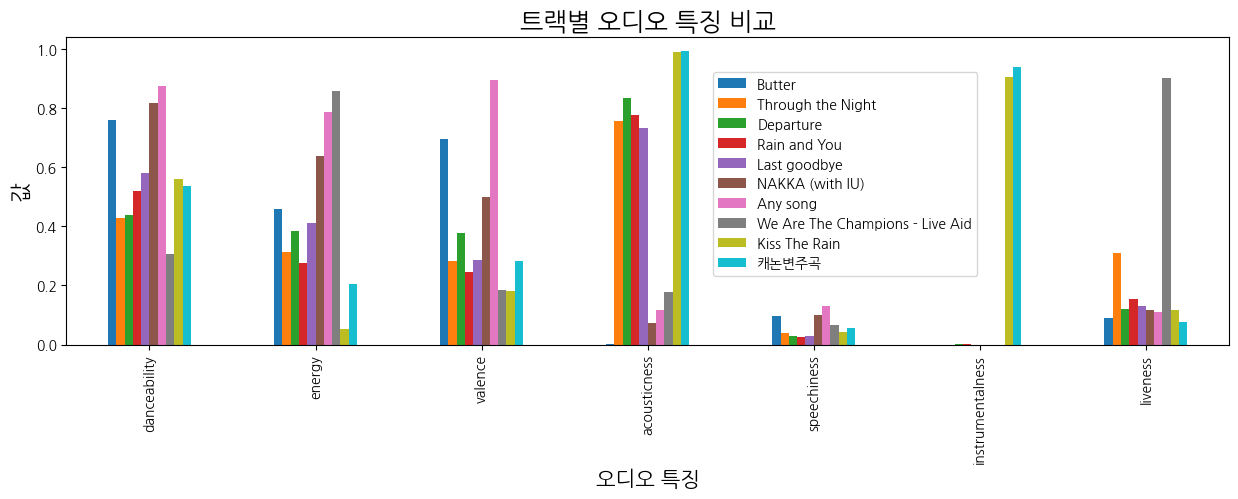

In [44]:
import matplotlib.pyplot as plt

selected_columns = ["danceability", "energy", "valence", "acousticness",
                    "speechiness", "instrumentalness", "liveness"]
df_tracks_audio_features2 = df_tracks_audio_features[selected_columns]

ax = df_tracks_audio_features2.T.plot.bar(figsize=(15,4))
ax.legend(df_tracks_audio_features["title"],  bbox_to_anchor=(0.55, 0.2))

# x축 라벨, y축 라벨, title 지정
ax.set_xlabel('오디오 특징', fontsize = 15)
ax.set_ylabel('값', fontsize = 15)
ax.set_title('트랙별 오디오 특징 비교', fontsize = 18)

plt.show()

In [34]:
def get_spotify_album_info(album_id):
    url = "https://api.spotify.com/v1/albums/{id}".format(id=album_id)
    ACCESS_TOKEN = get_spotify_access_token(CLIENT_ID, CLIENT_SECRET)

    headers = {"Authorization": "Bearer " + ACCESS_TOKEN} # 헤더 생성

    r = requests.get(url, headers=headers) # GET 방법으로 응답을 요청

    return r.json()

In [35]:
album_id = "01dPJcwyht77brL4JQiR8R" # 앨범 ID(아이유 IU 5th Album 'LILAC' 앨범)

album_data = get_spotify_album_info(album_id)
album_data.keys()

dict_keys(['album_type', 'artists', 'available_markets', 'copyrights', 'external_ids', 'external_urls', 'genres', 'href', 'id', 'images', 'label', 'name', 'popularity', 'release_date', 'release_date_precision', 'total_tracks', 'tracks', 'type', 'uri'])

In [36]:
print("[앨범 정보]")
print("- 아티스트:", get_artists(album_data['artists'])) # get_artists() 함수 이용
print("- 앨범 제목:", album_data['name'])
print("- 앨범 발표일:", album_data['release_date'])
print("- 앨범의 곡 개수:", album_data['total_tracks'])
print("- 앨범 ID:", album_data['id'])
print("- 앨범 인기도:", album_data['popularity'])
print("- 앨범 Label:", album_data['label'])

[앨범 정보]
- 아티스트: IU
- 앨범 제목: IU 5th Album 'LILAC'
- 앨범 발표일: 2021-03-25
- 앨범의 곡 개수: 10
- 앨범 ID: 01dPJcwyht77brL4JQiR8R
- 앨범 인기도: 62
- 앨범 Label: EDAM Entertainment


In [37]:
def get_spotify_album_tracks(album_id):
    url = "https://api.spotify.com/v1/albums/{id}/tracks".format(id=album_id)
    ACCESS_TOKEN = get_spotify_access_token(CLIENT_ID, CLIENT_SECRET)

    headers = {"Authorization": "Bearer " + ACCESS_TOKEN} # 헤더 생성

    r = requests.get(url, headers=headers) # GET 방법으로 요청해 응답받음

    return r.json()

In [38]:
album_id = "01dPJcwyht77brL4JQiR8R" # 앨범 ID(아이유 IU 5th Album 'LILAC' 앨범)

album_tracks_data = get_spotify_album_tracks(album_id)

print("[앨범 트랙 정보]")
print("- 앨범 트랙 API URL:", album_tracks_data['href'])
print("- 설정한 트랙 수 :", album_tracks_data['limit'])
print("- 설정한 트랙 오프셋:", album_tracks_data['offset'])
print("- 앨범의 곡 개수:", album_tracks_data['total'])
print("- 다음 트랙 API URL:", album_tracks_data['next'])

[앨범 트랙 정보]
- 앨범 트랙 API URL: https://api.spotify.com/v1/albums/01dPJcwyht77brL4JQiR8R/tracks?offset=0&limit=20
- 설정한 트랙 수 : 20
- 설정한 트랙 오프셋: 0
- 앨범의 곡 개수: 10
- 다음 트랙 API URL: None


In [39]:
import pandas as pd

def get_album_track(album_id):
    album_tracks_data = get_spotify_album_tracks(album_id)
    album_tracks = album_tracks_data['items']

    df_album_tracks = pd.DataFrame(album_tracks) # DataFrame 데이터로 변환

    df_album_tracks2 = df_album_tracks[['artists', 'name', 'duration_ms', 'id']] # DataFrame 데이터에서 열 선택

    df_album_tracks3 = df_album_tracks2.copy() # DataFrame 데이터 복사
    df_album_tracks3['artists'] = df_album_tracks3['artists'].apply(get_artists) # 함수를 artists 열의 각 항목에 적용

    df_album_tracks4 = df_album_tracks3.copy() # DataFrame 데이터 복사
    df_album_tracks4['duration_ms'] = df_album_tracks4['duration_ms'].apply(convert_msec) # 함수를 artists 열의 각 항목에 적용
    df_album_tracks4.rename(columns = {'duration_ms' : 'duration'}, inplace = True) # duration_ms 열 이름을 duration로 변경

    df_album_tracks4.columns = ["아티스트", "곡 제목", "곡의 길이", "곡 ID"] # 열 제목을 변경

    return df_album_tracks4

In [40]:
album_id = "01dPJcwyht77brL4JQiR8R" # 앨범 ID(아이유 IU 5th Album 'LILAC' 앨범)

df_IU_album_tracks = get_album_track(album_id)
df_IU_album_tracks.head()

,아티스트,곡 제목,곡의 길이,곡 ID
0,IU,LILAC,00:03:34.253,5xrtzzzikpG3BLbo4q1Yul
1,IU,Flu,00:03:08.293,2j0MsDAMJ2ahsxP3z86ChI
2,IU,Coin,00:03:13.080,7CZRguMolNqIobnXxpV735
3,IU,Hi spring Bye,00:05:24.280,2M7a2Us8CEU1HZHj70byGX
4,IU,Celebrity,00:03:15.546,5nCwjUUsmBuNZKn9Xu10Os


In [41]:
import yfinance as yf

ticker_symbol = "TSLA" # 테슬라 주식 심볼
ticker_data = yf.Ticker(ticker_symbol)

# 해당 종목의 정보 가져오기
# ticker_data.info

df = ticker_data.history(period='5d')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-04-30 00:00:00-04:00,186.979996,190.949997,182.839996,183.279999,127031800,0.0,0.0
2024-05-01 00:00:00-04:00,182.000000,185.860001,179.009995,179.990005,92829700,0.0,0.0
2024-05-02 00:00:00-04:00,182.860001,184.600006,176.020004,180.009995,89148000,0.0,0.0
2024-05-03 00:00:00-04:00,182.100006,184.779999,178.419998,181.190002,75491500,0.0,0.0
2024-05-06 00:00:00-04:00,183.800003,187.559998,182.199997,184.759995,84222000,0.0,0.0
